# Machine Vision
## Assignment 2 – Color

## Personal details

* **Name:** `PUT YOUR NAME HERE.`
* **Student ID:** `PUT YOUR STUDENT ID HERE.`

## Introduction

In this assignment, you will explore the concepts of white balance (WB), color transformations, and 2D scatter plots. The assignment is centered around two images from the [**Rendered WB dataset**](https://yorkucvil.github.io/projects/public_html/sRGB_WB_correction/dataset.html).
The first image, `incorrect_wb.jpg` (Figure 1a), exhibits an incorrect white balance with a noticeable blue color cast. In contrast, the second image, `ideal_wb.jpg` (Figure 1b) has been perfectly white-balanced using a color chart included in the scene. The third image (Figure 1c) shows the result of applying the gray world assumption for white balancing. Your goal is to implement this basic white balancing method. You will also visualize the effect of white balancing using 2D scatter plots in the CIELAB color space.

Before starting, please study [**Lecture 3**](https://moodle.oulu.fi/mod/page/view.php?id=1705511) (Light and color) and the example code in [**`Color.ipynb`**](https://github.com/jtheikkila/mvis/blob/master/jupyter/Color.ipynb).

<img src="fig1.jpg">

Let us start by reading and visualizing the images:

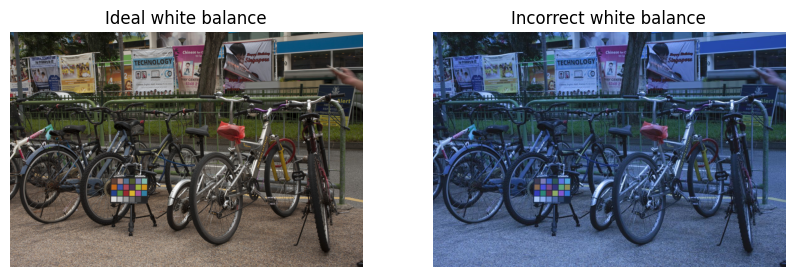

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read images
img_ideal = cv2.imread('ideal_wb.jpg')
img_incorrect = cv2.imread('incorrect_wb.jpg')

# Convert from BGR to RGB
img_ideal = cv2.cvtColor(img_ideal, cv2.COLOR_BGR2RGB)
img_incorrect = cv2.cvtColor(img_incorrect, cv2.COLOR_BGR2RGB)

# Display both images side by side
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(img_ideal)
plt.title('Ideal white balance')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_incorrect)
plt.title('Incorrect white balance')
plt.axis('off')
plt.show()

## Task 1 – White balancing (1.0 point)

White balance (WB) ensures that objects in an image appear with consistent colors, regardless of the lighting conditions. It aims to normalize the effects of illumination, making objects appear as if they were under ideal “white light”. WB is performed by the camera’s integrated signal processor (ISP) on the raw-RGB image. This involves estimating the illumination in the scene and scaling each color channel to normalize the effect of the light source. After this, the ISP applies additional steps, such as a nonlinear gamma correction, to produce the final sRGB image.

In this task, we aim to correct the white balance of the image `incorrect_wb.jpg`. Since the raw-RGB image is not available, we perform the white balancing in the sRGB color space. Your task is to implement a basic WB method based on the **gray world assumption**, which assumes that the average intensity of each color channel (red, green, and blue) in a well-balanced image should be approximately equal. This is typically a reasonable assumption if we have a good distribution of colors in the image.

The aim is to multiply each color channel by a scaling factor to white balance the image. Mathematically, the correction can be defined as
$$
I'_c(x, y) = I_c(x, y) \cdot \frac{\mu}{\mu_c}, \quad \text{for } c \in \{R, G, B\}
$$
where:
- $I_c(x, y)$ is the intensity of channel $c$ at pixel $(x, y)$,
- $I'_c(x, y)$ is the corrected intensity,
- $\mu_c$ is the average intensity of channel $c$,
- $\mu = \frac{1}{3} (\mu_R + \mu_G + \mu_B)$ is the overall average intensity across all channels.

### Instructions
Complete the function `white_balance(img)` shown below. Your implementation should:
1. Compute the average intensity of each color channel $\mu_R$, $\mu_G$, and $\mu_B$.
2. Compute the overall average intensity $\mu$.
3. Calculate the scaling factor for each channel $\frac{\mu}{\mu_c}$.
4. Apply the scaling factors to the corresponding channels.
5. Ensure that all pixel values are clipped to the range [0, 255].

(-0.5, 1123.5, 748.5, -0.5)

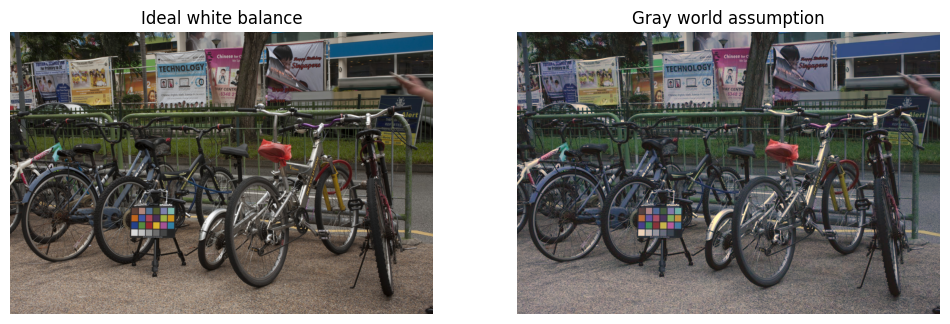

In [2]:
def white_balance(img):

    img_corrected = img.copy()
    img_corrected = img_corrected.astype(np.float32)

    # ---------- YOUR CODE STARTS HERE -----------

    R, G, B = cv2.split(img_corrected)

    R_mean = np.mean(R)
    G_mean = np.mean(G)
    B_mean = np.mean(B)

    total_mean = (R_mean + G_mean + B_mean) / 3

    R_scaling = total_mean / R_mean
    G_scaling = total_mean / G_mean
    B_scaling = total_mean / B_mean

    img_corrected = cv2.merge((R * R_scaling, G * G_scaling, B * B_scaling))


    # ----------- YOUR CODE ENDS HERE ------------

    # Clip and convert to uint8
    img_corrected = np.clip(img_corrected, 0, 255)
    img_corrected = img_corrected.astype(np.uint8)

    return img_corrected

img_wb = white_balance(img_incorrect)

# Display both images side by side
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img_ideal)
plt.title('Ideal white balance')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_wb)
plt.title('Gray world assumption')
plt.axis('off')

## Task 2 – Scatter Plots (1.0 points)

In this task, you will visualize the effect of white balancing on the color distribution of an image in the CIELAB color space. The goal is to compare the 2D scatter plots of the incorrectly white-balanced image `img_incorrect`, gray-world white-balanced image `img_wb`, and ideally white-balanced image `img_ideal`. The 2D scatter plot should depict the distribution of pixel colors in the a* (green-red) and b* (blue-yellow) channels of the CIELAB color space. The example code in [**`Color.ipynb`**](https://github.com/jtheikkila/mvis/blob/master/jupyter/Color.ipynb) will help you to complete this task.

By creating these scatter plots, you will observe how the gray-world white balancing modifies the color distribution. Ideally, the scatter plot for the white-balanced image should closely resemble that of the ideal white-balanced image.

### Instructions
Implement the function `scatter_plot(img_rgb)` to generate 2D scatter plots.
1. Resize the input image by a factor of 4 to reduce computational overhead.
2. Convert the RGB image to the CIELAB color space using OpenCV.
3. Extract the `a*` and `b*` channels for the 2D scatter plot.
4. Use the RGB colors of the pixels to color the scatter plot markers.
5. Run the code cell to create and compare the scatter plots for `img_incorrect`, `img_ideal`, and `img_wb`. The resulting scatter plots should be similar (not identical) to those shown in Figure 1.

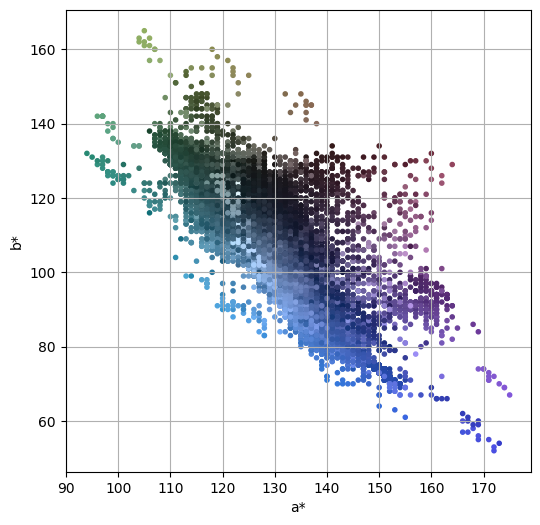

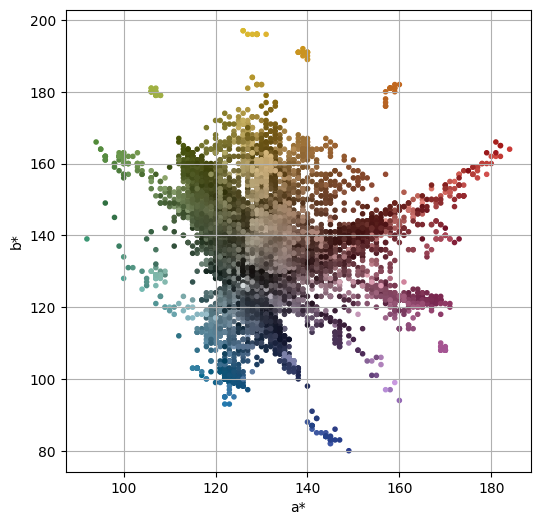

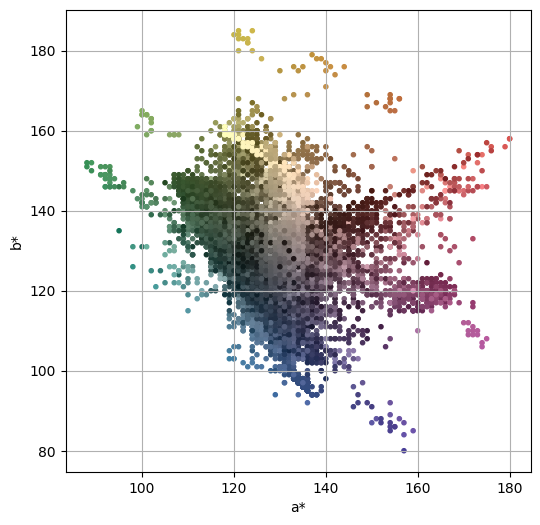

In [5]:
def scatter_plot(img_rgb):

    # ---------- YOUR CODE STARTS HERE -----------
    img_rgb = cv2.resize(img_rgb, (0,0), fx=0.25, fy=0.25)
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

    L, A, B = cv2.split(img_lab)

    colors = img_rgb.reshape((-1, 3)) / 255.0

    plt.figure(figsize=(6, 6))
    plt.scatter(A, B, c=colors, marker='.')
    plt.xlabel('a*')
    plt.ylabel('b*')

    plt.grid(True)
    plt.show()

    # ----------- YOUR CODE ENDS HERE ------------

scatter_plot(img_incorrect)
scatter_plot(img_ideal)
scatter_plot(img_wb)

# Submission

1. Go to `Kernel -> Restart & Clear Output` to remove all outputs.
2. Compress this notebook (`MV_A2.ipynb`) into `MV_A2.zip`.
3. Submit the **zip** file on Moodle.

**Deadline: 26.01.2025**